# Imports

In [1]:
# Append location to path to allow custom modules to be used.
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "..")))

In [13]:
import cgael
from cgael.models.extras.LanguageDiscriminator import *
from cgael.metrics import brevity

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layer

import pygad
import pygad.kerasga

import numpy as np
import pandas as pd

from PIL import Image

from matplotlib import pyplot as plt

# Set Up

In [25]:
root_folder = os.path.join("C:",os.sep,"Users","nicho","PyProjects","CGAEL_Results")
experiment_folder = "discriminator"
experiment_prefix = "eng_L10"

In [26]:
os.makedirs(os.path.join(root_folder, experiment_folder), exist_ok=True)

In [27]:
ID_FORMAT = "{experiment_prefix}_{i}"

i = 1
while os.path.exists(os.path.join(root_folder, experiment_folder, f"{ID_FORMAT.format(experiment_prefix=experiment_prefix, i=i)}.npy")):
    i += 1
    
experiment_id = ID_FORMAT.format(experiment_prefix=experiment_prefix, i=i)
filename = f"{experiment_id}.npy"
filepath = os.path.join(root_folder, experiment_folder, filename)
print(filepath)

C:\Users\nicho\PyProjects\CGAEL_Results\discriminator\eng_L10_1.npy


# Training

In [6]:
ts = cgael.LanguageTokenSet("CHAT", '-')

In [7]:
encode_length = 10

In [8]:
english_words = set([
    "A", 
    "AT", "HA", 
    "ACT", "CAT", "HAT", 
    "CHAT", "TACT", "THAT", 
    "CATCH", "HATCH"
])

In [9]:
gen = LanguageDiscriminatorGenerator(
    tokens=ts, 
    real_words=english_words, 
    encode_length=encode_length, 
    batch_size=16, 
    batch_count=100
)

In [10]:
discrim = LanguageDiscriminatorModel(word_length=encode_length)
history = discrim.train(gen, epochs=100)


Epoch 1/100

100/100 [==============================] - 2s 6ms/step - loss: 0.6025 - accuracy: 0.7256
Epoch 2/100
100/100 [==============================] - 1s 6ms/step - loss: 0.4486 - accuracy: 0.7763
Epoch 3/100
100/100 [==============================] - 1s 7ms/step - loss: 0.3800 - accuracy: 0.8300
Epoch 4/100
100/100 [==============================] - 1s 6ms/step - loss: 0.3417 - accuracy: 0.8550
Epoch 5/100
100/100 [==============================] - 1s 7ms/step - loss: 0.3203 - accuracy: 0.8594
Epoch 6/100
100/100 [==============================] - 1s 9ms/step - loss: 0.3210 - accuracy: 0.8500
Epoch 7/100
100/100 [==============================] - 1s 9ms/step - loss: 0.2828 - accuracy: 0.8737
Epoch 8/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2945 - accuracy: 0.8662
Epoch 9/100
100/100 [==============================] - 1s 9ms/step - loss: 0.2954 - accuracy: 0.8631
Epoch 10/100
100/100 [==============================] - 1s 9ms/step - loss: 0.2733 - accu

In [28]:
np.save(filepath, np.array(discrim.model.get_weights(), dtype="object"))

# Evaluation

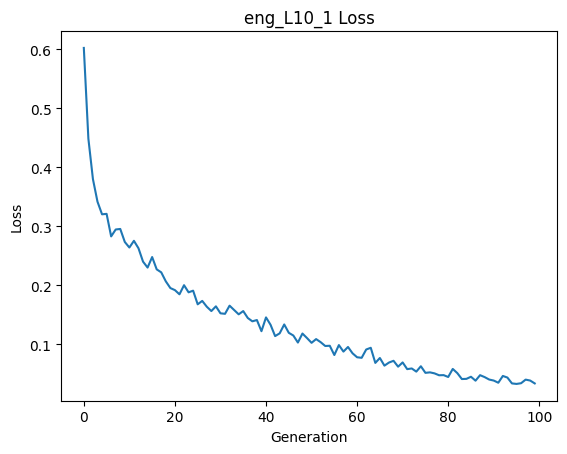

In [31]:
plt.plot(history.history["loss"])
plt.title(f"{experiment_id} Loss")
plt.xlabel("Generation")
plt.ylabel("Loss")
plt.savefig(os.path.join(root_folder, experiment_folder, f"{experiment_id}_loss.png"))
plt.show()

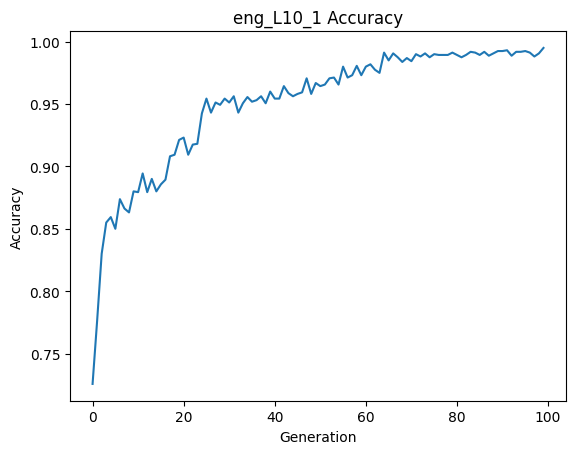

In [32]:
plt.plot(history.history["accuracy"])
plt.title(f"{experiment_id} Accuracy")
plt.xlabel("Generation")
plt.ylabel("Accuracy")
plt.savefig(os.path.join(root_folder, experiment_folder, f"{experiment_id}_accuracy.png"))
plt.show()